(24, 151) (6, 151) (24, 2) (6, 2)


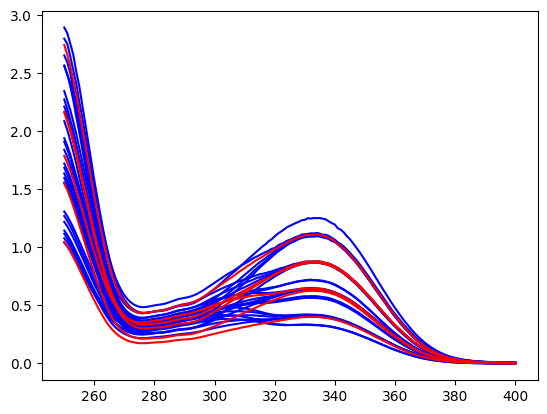

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
#  Tiến hành đọc dữ liệu, ma trận tín hiệu lưu vào biến X, ma trận nồng độ lưu vào biến y
X = pd.read_excel("signal.xlsx")
y = pd.read_excel("conc.xlsx")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# In ra hình dạng của các ma trận
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Vẽ phổ của các mẫu trong tập train
plt.plot(X_train.T, c='b')
# Vẽ phổ của các mẫu trong tập test
plt.plot(X_test.T, c='r')
plt.show()

In [2]:
def PRESS(Y, Y_pred):
    return np.sum(np.sum((Y - Y_pred)**2, axis=1), axis=0)

[14.306049118477489, 0.3547507728681891, 0.15743716371632166, 0.15245981430006772, 0.08677890035821702, 0.08009915060761172, 0.06618653457858506, 0.06505480454350714, 0.05236969311467063, 0.04280378109592997, 0.03450649496881989, 0.021094150403000583, 0.012992498696897923, 0.010362856904588293, 0.0068499658662650766, 0.0021513330026273936, 0.0018936929056709694, 0.0016699863477109885, 0.00024066709283935206, 0.00021808597602752732, 0.00014490238572542572, 1.3170141549690027e-05, 9.562812249146165e-28]


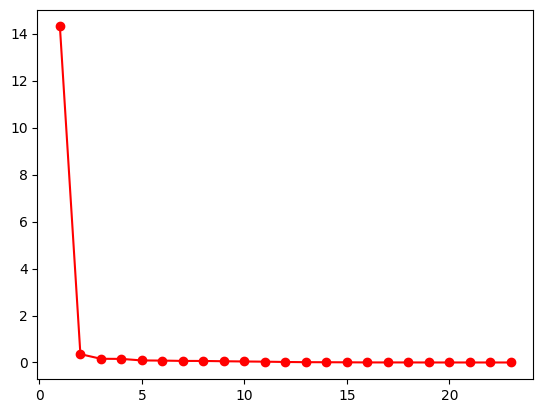

In [3]:
n_PRESS = []
for i in range (1, 24):
    PLS = PLSRegression(n_components = i, max_iter = 1000)
    PLS.fit(X_train, y_train)
    y_pred = PLS.predict(X_train)
    n_PRESS.append(PRESS(y_train, y_pred))
print(n_PRESS)
plt.plot(range(1, 24), n_PRESS, "-ro")
plt.show()

[0.46142062894128316, 0.9712899475982513, 0.9894787356452344, 0.9926423203592325, 0.9953010865928043, 0.9961614233677083, 0.9968744701814358, 0.9972646133416552, 0.9977947184459063, 0.9981706977046885, 0.998461742231622, 0.9989641525420487, 0.999262744281384, 0.999359957451365, 0.9994852993818633, 0.999652206432388, 0.9998204925211446, 0.9999098852303433, 0.9999729917031193, 0.9999889986742394, 0.9999946024706114, 0.9999994729742775, 1.0]


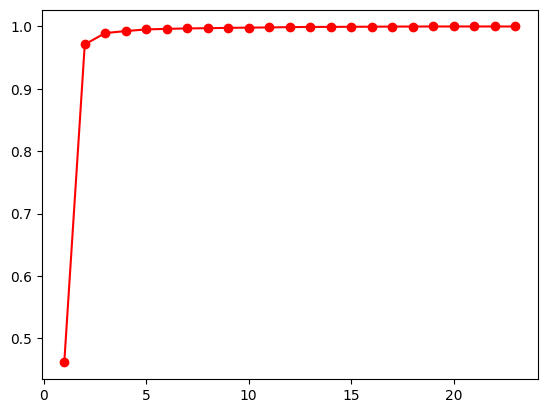

In [4]:
r2 = []
for i in range (1, 24):
    PLS = PLSRegression(n_components = i, max_iter = 1000)
    #now we can call functions on PLS such as "PLS.fit"

    xScores, yScores = PLS.fit_transform(X_train, y_train) 

    r2.append(PLS.score(X_train, y_train))
print(r2)
plt.plot(range(1, 24),r2, "-ro")
plt.show()

In [5]:
# Tạo mô hình PLS với 4PC
model = PLSRegression(n_components = 4, max_iter = 1000)
# Cho mô hình học dữ liệu train
model.fit(X_train, y_train)
# Dử dụng mô hình để dự đoán nống độ của ma trận tín hiệu test 
y_pred = model.predict(X_test)
print(pd.DataFrame(np.concatenate((y_pred, y_test), axis=1)
                   ,columns=["Predict Bentazone", "Predict Pymetrozine", "True Bentazone", "True Pymetrozine"]))

   Predict Bentazone  Predict Pymetrozine  True Bentazone  True Pymetrozine
0           0.403236             3.554354            0.40               3.5
1           0.244870             1.526086            0.25               1.5
2           0.547792             2.002293            0.55               2.0
3           0.690659             3.491651            0.70               3.5
4           0.539011             2.513404            0.55               2.5
5           0.402655             1.497908            0.40               1.5


In [6]:
print("Bảng phần trăm sai số")
print(np.abs(y_pred-y_test) / y_test * 100)

Bảng phần trăm sai số
    Bentazone  Pymetrozine
17   0.808884     1.552973
21   2.052153     1.739054
10   0.401445     0.114657
19   1.334434     0.238538
14   1.998091     0.536179
20   0.663870     0.139442
